# Lesson 2.2:
# Using the PowerGrid Models API with SPARQL Queries

This tutorial focuses on how to make generic queries of the PowerGrid Models API to obtain names, mRIDs, measurements, and control setting objects modeled in CIM XML for common power system equipment used in GridAPPS-D.

The lesson reviews the format used for making generic SPARQL queries and then presents an extensive catalog of cut-and-paste code blocks for the most common queries.

__Learning Objectives:__

At the end of the tutorial, the user should be able to use the PowerGrid Models API to

* 
* 
* 

## Getting Started

Before running any of the sample routines in this tutorial, it is first necessary to start the GridAPPS-D Platform and establish a connection to this notebook so that we can start passing calls to the API.

_Open the Ubuntu terminal and start the GridAPPS-D Platform if it is not running already:_

`cd gridappsd-docker`

~/gridappsd-docker$ `./run.sh -t develop`

_Once containers are running,_

gridappsd@[container]:/gridappsd$ `./run-gridappsd.sh`

In [ ]:
# Establish connection to GridAPPS-D Platform:
from gridappsd import GridAPPSD
gapps = GridAPPSD("('localhost', 61613)", username='system', password='manager')
model_mrid = "_49AD8E07-3BF9-A4E2-CB8F-C3722F837B62" # IEEE 13 Node used for all example queries

---
# Table of Contents

* [1. Structure of Generic SPARQL Queries](#1.-Structure-of-Generic-SPARQL-Queries)
* [2. Making SPARQL Queries using the GridAPPSD-Python API](#2.-Making-SPARQL-Queries-using-the-GridAPPSD-Python-API)
* [3. Making SPARQL Queries using the STOMP Client](#3.-Making-SPARQL-Queries-using-the-STOMP-Client)
* [4. Making SPARQL Queries using the Blazegraph Workbench](#4.-Making-SPARQL-Queries-using-the-Blazegraph-Workbench)
* [5. Catalog of Common SPARQL Queries for CIM Objects](#5.-Catalog-of-Common-SPARQL-Queries-for-CIM-Objects)


# 1. Structure of Generic SPARQL Queries

The format of SPARQL queries was discussed in detail previously in [Lesson 1.7](). 



# 2. Making SPARQL Queries using the GridAPPSD-Python API



---
# 3. Making SPARQL Queries using the Blazegraph Workbench

Open the [Blazegraph Workbench](http://localhost:8889/bigdata/#query) hosted on [localhost:8889/bigdata](http://localhost:8889/bigdata/#query)


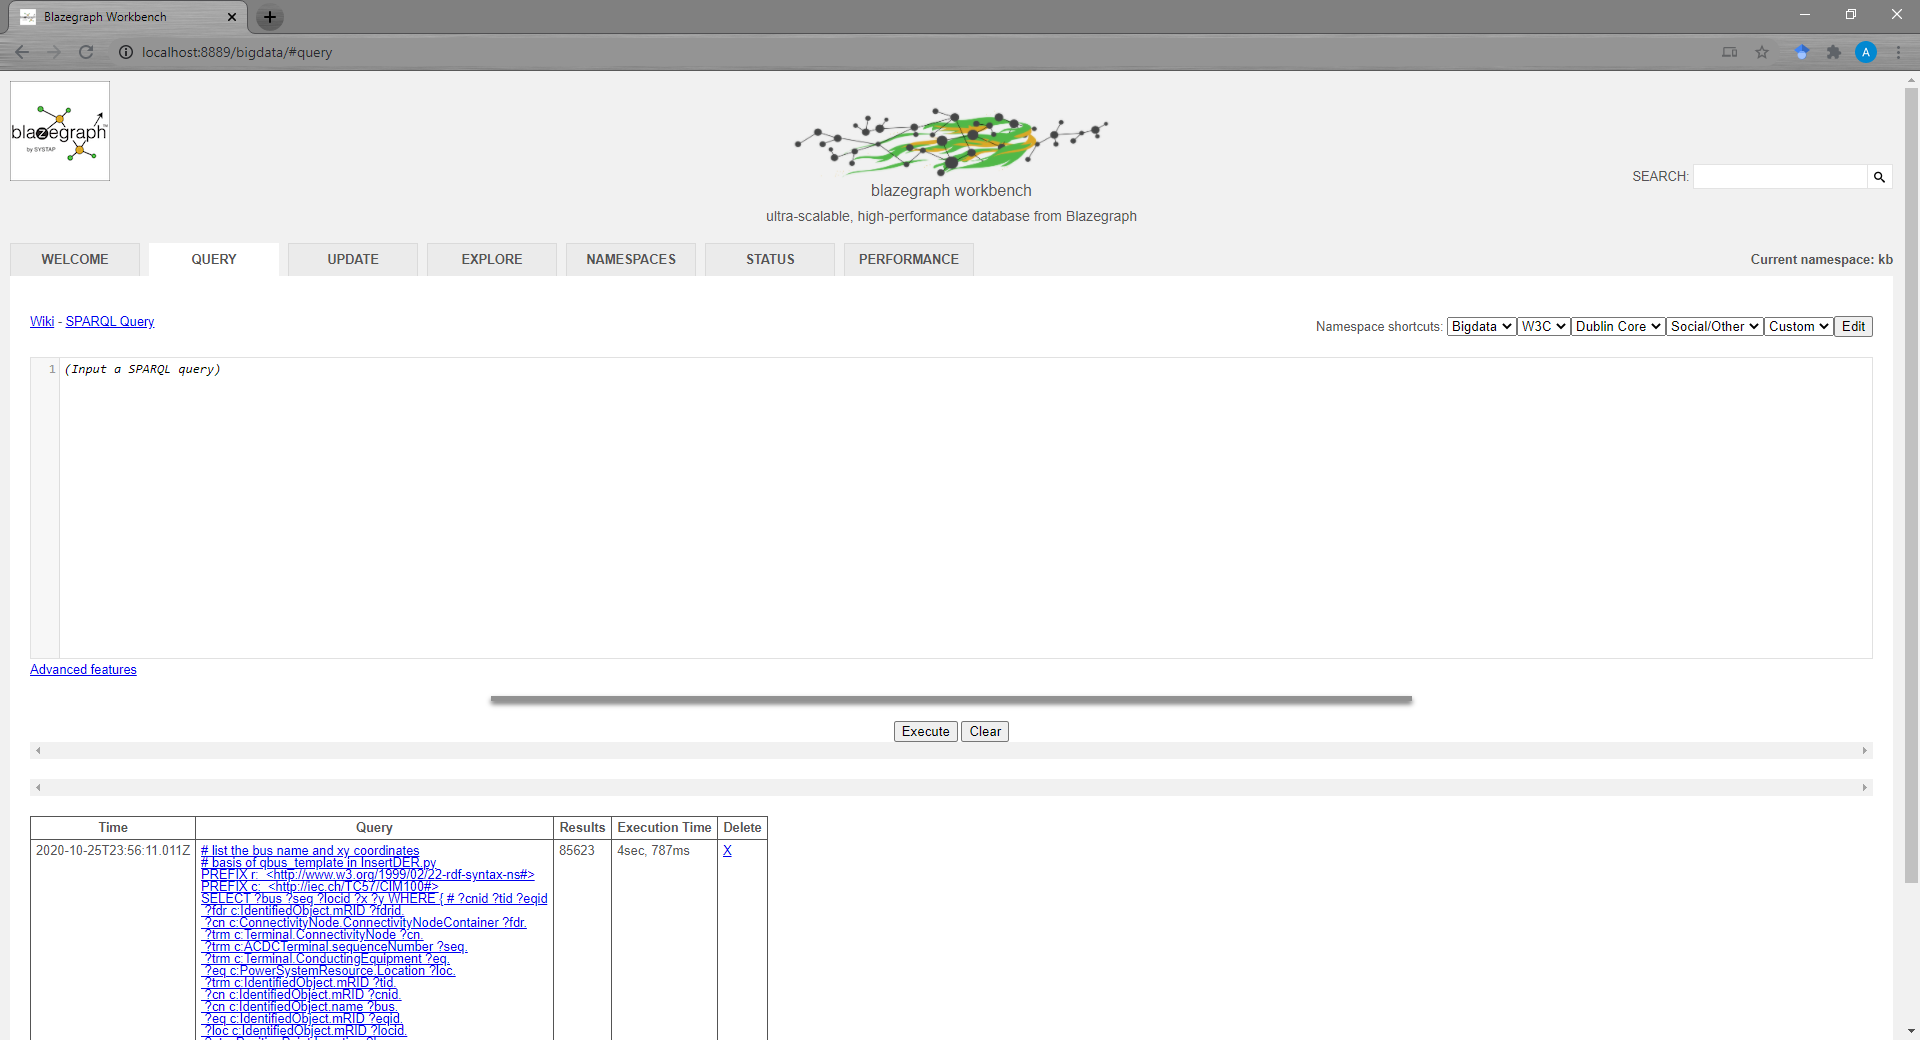


In the query input window, it is possible to directly copy and paste queries to the Blazegraph database. 



---
# 5. Catalog of Common SPARQL Queries for CIM Objects

The sections below present common power system equipment and measurement objects. The 



## 5.1. Queries for all feeder models and core objects

### List all the feeders, with substations and regions

In [ ]:
query = """
# list all the feeders, with substations and regions - DistFeeder
PREFIX r:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX c:  <http://iec.ch/TC57/CIM100#>
SELECT ?feeder ?fid ?station ?sid ?subregion ?sgrid ?region ?rgnid WHERE {
 ?s r:type c:Feeder.
 ?s c:IdentifiedObject.name ?feeder.
 ?s c:IdentifiedObject.mRID ?fid.
 ?s c:Feeder.NormalEnergizingSubstation ?sub.
 ?sub c:IdentifiedObject.name ?station.
 ?sub c:IdentifiedObject.mRID ?sid.
 ?sub c:Substation.Region ?sgr.
 ?sgr c:IdentifiedObject.name ?subregion.
 ?sgr c:IdentifiedObject.mRID ?sgrid.
 ?sgr c:SubGeographicalRegion.Region ?rgn.
 ?rgn c:IdentifiedObject.name ?region.
 ?rgn c:IdentifiedObject.mRID ?rgnid.
}
ORDER by ?station ?feeder
"""

In [ ]:
# Preview API call output for the query
gapps.query_data(query)

## 2. Get all mRID values by class and name



In [ ]:
query = """
PREFIX r:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX c:  <http://iec.ch/TC57/CIM100#>
SELECT ?type ?name ?id WHERE {
 ?s c:IdentifiedObject.name ?name.
 ?s c:IdentifiedObject.mRID ?id.
 ?s r:type ?rawtype.
  bind(strafter(str(?rawtype),"#") as ?type)
}
ORDER by ?type ?name
"""

In [ ]:
# Preview API call output
gapps.query_data(query)

# 1. Querying for Buses and Nodes

## 1.1. List the bus name and xy coordinates


Note: this query is the basis of qbus_template in InsertDER.py




In [ ]:
query = """
PREFIX r:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX c:  <http://iec.ch/TC57/CIM100#>
SELECT ?bus ?seq ?locid ?x ?y WHERE { # ?cnid ?tid ?eqid
VALUES ?fdrid {"%s"}  # inserts model_mrid
 ?fdr c:IdentifiedObject.mRID ?fdrid.
 ?cn c:ConnectivityNode.ConnectivityNodeContainer ?fdr.
 ?trm c:Terminal.ConnectivityNode ?cn.
 ?trm c:ACDCTerminal.sequenceNumber ?seq.
 ?trm c:Terminal.ConductingEquipment ?eq.
 ?eq c:PowerSystemResource.Location ?loc.
 ?trm c:IdentifiedObject.mRID ?tid.
 ?cn c:IdentifiedObject.mRID ?cnid.
 ?cn c:IdentifiedObject.name ?bus.
 ?eq c:IdentifiedObject.mRID ?eqid.
 ?loc c:IdentifiedObject.mRID ?locid.
 ?pt c:PositionPoint.Location ?loc.
 # caution - these next three triples make the query very slow, uncomment only if needed
 # ?pt c:PositionPoint.sequenceNumber ?seq.
 # ?pt c:PositionPoint.xPosition ?x.
 # ?pt c:PositionPoint.yPosition ?y
}
ORDER BY ?bus ?locid

""" % model_mrid

In [ ]:
# Preview API call output for the query on the IEEE 13 node model
gapps.query_data(query)

## List all the connectivity nodes by feeder

In [ ]:
query = """
# list all the connectivity nodes by feeder
PREFIX r:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX c:  <http://iec.ch/TC57/CIM100#>
SELECT ?feeder ?name WHERE {
 VALUES ?fdrid {"%s"}  # inserts model_mrid
 ?fdr c:IdentifiedObject.mRID ?fdrid.
 ?s c:ConnectivityNode.ConnectivityNodeContainer ?fdr.
 ?s r:type c:ConnectivityNode.
 ?s c:IdentifiedObject.name ?name.
 ?fdr c:IdentifiedObject.name ?feeder.
}
ORDER by ?feeder ?name
""" % model_mrid

In [ ]:
# Preview API call output for the query on the IEEE 13 node model
gapps.query_data(query)

## List all the connectivity nodes by feeder, with voltage limits

In [ ]:
query = '''
PREFIX r:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX c:  <http://iec.ch/TC57/CIM100#>
SELECT ?feeder ?bus ?cnid ?val ?dur ?dir WHERE {
VALUES ?fdrid {"%s"}  # inserts model_mrid
 ?fdr c:IdentifiedObject.mRID ?fdrid.
 ?s c:ConnectivityNode.ConnectivityNodeContainer ?fdr.
 ?s r:type c:ConnectivityNode.
 ?s c:IdentifiedObject.name ?bus.
 ?s c:IdentifiedObject.mRID ?cnid.
 ?fdr c:IdentifiedObject.name ?feeder.
 ?s c:ConnectivityNode.OperationalLimitSet ?ols.
 ?vlim c:OperationalLimit.OperationalLimitSet ?ols.
 ?vlim r:type c:VoltageLimit.
 ?vlim c:OperationalLimit.OperationalLimitType ?olt.
 ?olt c:OperationalLimitType.acceptableDuration ?dur.
 ?olt c:OperationalLimitType.direction ?rawdir.
  bind(strafter(str(?rawdir),"OperationalLimitDirectionKind.") as ?dir)
 ?vlim c:VoltageLimit.value ?val.
}
ORDER by ?feeder ?bus ?val
''' % model_mrid

In [ ]:
# Preview API call output for the query on the IEEE 13 node model
gapps.query_data(query)

## 1.2. List all the connectivity node base voltages by feeder, for sensor service


In [ ]:
query = """
PREFIX r:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX c:  <http://iec.ch/TC57/CIM100#>
SELECT DISTINCT ?feeder ?busname ?cnid ?nomv WHERE {
 VALUES ?fdrid {"%s"}  # inserts model_mrid
 ?fdr c:IdentifiedObject.mRID ?fdrid.
 ?bus c:ConnectivityNode.ConnectivityNodeContainer ?fdr.
 ?bus r:type c:ConnectivityNode.
 ?bus c:IdentifiedObject.name ?busname.
 ?bus c:IdentifiedObject.mRID ?cnid.
 ?fdr c:IdentifiedObject.name ?feeder.
 ?trm c:Terminal.ConnectivityNode ?bus.
 ?trm c:Terminal.ConductingEquipment ?ce.
 ?ce  c:ConductingEquipment.BaseVoltage ?bv.
 ?bv  c:BaseVoltage.nominalVoltage ?nomv.
}
ORDER by ?feeder ?busname ?nomv
""" % model_mrid

In [ ]:
# Preview API call output for the query on the IEEE 13 node model
gapps.query_data(query)

## List all the connectivity node base voltages by feeder, for visualization

In [ ]:
query = """
# list all the connectivity node base voltages by feeder, for visualization
PREFIX r:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX c:  <http://iec.ch/TC57/CIM100#>
SELECT DISTINCT ?feeder ?busname ?nomv WHERE {
 VALUES ?fdrid {"%s"}  # inserts model_mrid
 ?fdr c:IdentifiedObject.mRID ?fdrid.
 ?bus c:ConnectivityNode.ConnectivityNodeContainer ?fdr.
 ?bus r:type c:ConnectivityNode.
 ?bus c:IdentifiedObject.name ?busname.
 ?fdr c:IdentifiedObject.name ?feeder.
 ?trm c:Terminal.ConnectivityNode ?bus.
 ?trm c:Terminal.ConductingEquipment ?ce.
 ?ce  c:ConductingEquipment.BaseVoltage ?bv.
 ?bv  c:BaseVoltage.nominalVoltage ?nomv.
}
ORDER by ?feeder ?busname ?nomv
""" % model_mrid

In [ ]:
# Preview API call output for the query on the IEEE 13 node model
gapps.query_data(query)

# Querying for Switching Equipment

The sample queries below present the most commonly needed queries for power system model information related to switching objects. 

The models currently stored in GridAPPS-D only use the _LoadBreakSwitch_ object for switching objects, so queries for other classes of switching objects are commented out in the sample code blocks below.


## Fuse, Breaker, Recloser, LoadBreakSwitch, Sectionaliser

This query features several different types of distribution switches available within CIM XML. The models currently stored in GridAPPS-D only use the _LoadBreakSwitch_ object for switching objects, so the other queries are commented out in this sample code block.

Note: the sectionalizer object will be supported in a future release.

In [ ]:
query = """
PREFIX r:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX c:  <http://iec.ch/TC57/CIM100#>
SELECT ?name ?basev ?open ?continuous ?breaking ?fdrid (group_concat(distinct ?bus;separator="\n") as ?buses) (group_concat(distinct ?phs;separator="\n") as ?phases) WHERE {
 # ?s r:type c:Sectionaliser.
 # ?s r:type c:Disconnector.
 # ?s r:type c:Fuse.
 # ?s r:type c:Recloser.
 # ?s r:type c:Breaker.
 ?s r:type c:LoadBreakSwitch.
 ?s c:Equipment.EquipmentContainer ?fdr.
 ?fdr c:IdentifiedObject.mRID ?fdrid.
 ?s c:IdentifiedObject.name ?name.
 ?s c:ConductingEquipment.BaseVoltage ?bv.
 ?bv c:BaseVoltage.nominalVoltage ?basev.
 ?s c:Switch.normalOpen ?open.
 ?s c:Switch.ratedCurrent ?continuous.
 OPTIONAL {?s c:ProtectedSwitch.breakingCapacity ?breaking.}
 ?t c:Terminal.ConductingEquipment ?s.
 ?t c:Terminal.ConnectivityNode ?cn. 
 ?cn c:IdentifiedObject.name ?bus
 OPTIONAL {?swp c:SwitchPhase.Switch ?s.
 ?swp c:SwitchPhase.phaseSide1 ?phsraw.
   bind(strafter(str(?phsraw),"SinglePhaseKind.") as ?phs) }
}
GROUP BY ?name ?basev ?open ?continuous ?breaking ?fdrid
ORDER BY ?name
"""

In [ ]:
# Preview API call output for the query on the IEEE 13 node model
gapps.query_data(query)

In [ ]:
query = '''
# Storage - DistStorage
PREFIX r:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX c:  <http://iec.ch/TC57/CIM100#>
SELECT ?name ?bus ?ratedS ?ratedU ?ipu ?ratedE ?storedE ?state ?p ?q ?id ?fdrid (group_concat(distinct ?phs;separator="\\n") as ?phases) WHERE {
 ?s r:type c:BatteryUnit.
 ?s c:IdentifiedObject.name ?name.
 ?pec c:PowerElectronicsConnection.PowerElectronicsUnit ?s.
# feeder selection options - if all commented out, query matches all feeders
#VALUES ?fdrid {"_C1C3E687-6FFD-C753-582B-632A27E28507"}  # 123 bus
#VALUES ?fdrid {"_49AD8E07-3BF9-A4E2-CB8F-C3722F837B62"}  # 13 bus
#VALUES ?fdrid {"_5B816B93-7A5F-B64C-8460-47C17D6E4B0F"}  # 13 bus assets
#VALUES ?fdrid {"_4F76A5F9-271D-9EB8-5E31-AA362D86F2C3"}  # 8500 node
#VALUES ?fdrid {"_67AB291F-DCCD-31B7-B499-338206B9828F"}  # J1
#VALUES ?fdrid {"_9CE150A8-8CC5-A0F9-B67E-BBD8C79D3095"}  # R2 12.47 3
 ?pec c:Equipment.EquipmentContainer ?fdr.
 ?fdr c:IdentifiedObject.mRID ?fdrid.
 ?pec c:PowerElectronicsConnection.ratedS ?ratedS.
 ?pec c:PowerElectronicsConnection.ratedU ?ratedU.
 ?pec c:PowerElectronicsConnection.maxIFault ?ipu.
 ?s c:BatteryUnit.ratedE ?ratedE.
 ?s c:BatteryUnit.storedE ?storedE.
 ?s c:BatteryUnit.batteryState ?stateraw.
   bind(strafter(str(?stateraw),"BatteryState.") as ?state)
 ?pec c:PowerElectronicsConnection.p ?p.
 ?pec c:PowerElectronicsConnection.q ?q. 
 OPTIONAL {?pecp c:PowerElectronicsConnectionPhase.PowerElectronicsConnection ?pec.
 ?pecp c:PowerElectronicsConnectionPhase.phase ?phsraw.
   bind(strafter(str(?phsraw),"SinglePhaseKind.") as ?phs) }
 bind(strafter(str(?s),"#_") as ?id).
 ?t c:Terminal.ConductingEquipment ?pec.
 ?t c:Terminal.ConnectivityNode ?cn. 
 ?cn c:IdentifiedObject.name ?bus
}
GROUP by ?name ?bus ?ratedS ?ratedU ?ipu ?ratedE ?storedE ?state ?p ?q ?id ?fdrid
ORDER by ?name
'''

In [ ]:
# Preview API call output for the query on the IEEE 13 node model
gapps.query_data(query)

## SynchronousMachine - DistSyncMachine

In [ ]:
query = """
# SynchronousMachine - DistSyncMachine
PREFIX r:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX c:  <http://iec.ch/TC57/CIM100#>
SELECT ?name ?bus (group_concat(distinct ?phs;separator="\\n") as ?phases) ?ratedS ?ratedU ?p ?q ?id ?fdrid WHERE {
 VALUES ?fdrid {"%s"}  # inserts model_mrid
 ?s r:type c:SynchronousMachine.
 ?s c:IdentifiedObject.name ?name.
 ?s c:Equipment.EquipmentContainer ?fdr.
 ?fdr c:IdentifiedObject.mRID ?fdrid.
 ?s c:SynchronousMachine.ratedS ?ratedS.
 ?s c:SynchronousMachine.ratedU ?ratedU.
 ?s c:SynchronousMachine.p ?p.
 ?s c:SynchronousMachine.q ?q. 
 bind(strafter(str(?s),"#_") as ?id).
 OPTIONAL {?smp c:SynchronousMachinePhase.SynchronousMachine ?s.
 ?smp c:SynchronousMachinePhase.phase ?phsraw.
   bind(strafter(str(?phsraw),"SinglePhaseKind.") as ?phs) }
 ?t c:Terminal.ConductingEquipment ?s.
 ?t c:Terminal.ConnectivityNode ?cn. 
 ?cn c:IdentifiedObject.name ?bus
}
GROUP by ?name ?bus ?ratedS ?ratedU ?p ?q ?id ?fdrid
ORDER by ?name
""" % model_mrid

In [ ]:
# Preview API call output for the query on the IEEE 13 node model
gapps.query_data(query)

In [ ]:
query = """
# Solar - DistSolar
PREFIX r:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX c:  <http://iec.ch/TC57/CIM100#>
SELECT ?name ?bus ?ratedS ?ratedU ?ipu ?p ?q ?fdrid (group_concat(distinct ?phs;separator="\\n") as ?phases) WHERE {
 ?s r:type c:PhotovoltaicUnit.
 ?s c:IdentifiedObject.name ?name.
 ?pec c:PowerElectronicsConnection.PowerElectronicsUnit ?s.
# feeder selection options - if all commented out, query matches all feeders
#VALUES ?fdrid {"_C1C3E687-6FFD-C753-582B-632A27E28507"}  # 123 bus
#VALUES ?fdrid {"_49AD8E07-3BF9-A4E2-CB8F-C3722F837B62"}  # 13 bus
#VALUES ?fdrid {"_5B816B93-7A5F-B64C-8460-47C17D6E4B0F"}  # 13 bus assets
#VALUES ?fdrid {"_4F76A5F9-271D-9EB8-5E31-AA362D86F2C3"}  # 8500 node
#VALUES ?fdrid {"_67AB291F-DCCD-31B7-B499-338206B9828F"}  # J1
#VALUES ?fdrid {"_9CE150A8-8CC5-A0F9-B67E-BBD8C79D3095"}  # R2 12.47 3
 ?pec c:Equipment.EquipmentContainer ?fdr.
 ?fdr c:IdentifiedObject.mRID ?fdrid.
 ?pec c:PowerElectronicsConnection.ratedS ?ratedS.
 ?pec c:PowerElectronicsConnection.ratedU ?ratedU.
 ?pec c:PowerElectronicsConnection.maxIFault ?ipu.
 ?pec c:PowerElectronicsConnection.p ?p.
 ?pec c:PowerElectronicsConnection.q ?q.
 OPTIONAL {?pecp c:PowerElectronicsConnectionPhase.PowerElectronicsConnection ?pec.
 ?pecp c:PowerElectronicsConnectionPhase.phase ?phsraw.
   bind(strafter(str(?phsraw),"SinglePhaseKind.") as ?phs) }
 ?t c:Terminal.ConductingEquipment ?pec.
 ?t c:Terminal.ConnectivityNode ?cn. 
 ?cn c:IdentifiedObject.name ?bus
}
GROUP by ?name ?bus ?ratedS ?ratedU ?ipu ?p ?q ?fdrid
ORDER by ?name

"""

In [ ]:
# Preview API call output for the query on the IEEE 13 node model
gapps.query_data(query)

In [ ]:
query = """
# list houses - DistHouse
PREFIX r:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX c:  <http://iec.ch/TC57/CIM100#>
SELECT ?fdrname ?name ?parent ?coolingSetpoint ?coolingSystem ?floorArea ?heatingSetpoint ?heatingSystem ?hvacPowerFactor ?numberOfStories ?thermalIntegrity ?id ?fdrid 
WHERE { 
   VALUES ?fdrid {"%s"}  # inserts model_mrid
   ?h r:type c:House.
   ?h c:IdentifiedObject.name ?name.
   ?h c:IdentifiedObject.mRID ?id.
   ?h c:House.floorArea ?floorArea.
   ?h c:House.numberOfStories ?numberOfStories.
   OPTIONAL{?h c:House.coolingSetpoint ?coolingSetpoint.}
   OPTIONAL{?h c:House.heatingSetpoint ?heatingSetpoint.}
   OPTIONAL{?h c:House.hvacPowerFactor ?hvacPowerFactor.}
   ?h c:House.coolingSystem ?coolingSystemRaw.
   	bind(strafter(str(?coolingSystemRaw),"HouseCooling.") as ?coolingSystem) 
   ?h c:House.heatingSystem ?heatingSystemRaw.
   	bind(strafter(str(?heatingSystemRaw),"HouseHeating.") as ?heatingSystem)
   ?h c:House.thermalIntegrity ?thermalIntegrityRaw.
   	bind(strafter(str(?thermalIntegrityRaw),"HouseThermalIntegrity.") as ?thermalIntegrity)
   ?h c:House.EnergyConsumer ?econ.
   ?econ c:IdentifiedObject.name ?parent.
   ?fdr c:IdentifiedObject.mRID ?fdrid.
   ?fdr c:IdentifiedObject.name ?fdrname.
   ?econ c:Equipment.EquipmentContainer ?fdr.
} 
ORDER BY ?fdrname ?name
""" % model_mrid

In [ ]:
# Preview API call output for the query on the IEEE 13 node model
gapps.query_data(query)

# Querying for measurements



## List all measurements, with buses and equipments

In [ ]:
query = """
# list all measurements, with buses and equipments
PREFIX r: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX c: <http://iec.ch/TC57/CIM100#>
SELECT ?class ?type ?name ?bus ?phases ?eqtype ?eqname ?eqid ?trmid ?id WHERE {
 VALUES ?fdrid {"%s"}  # inserts model_mrid
 ?eq c:Equipment.EquipmentContainer ?fdr.
 ?fdr c:IdentifiedObject.mRID ?fdrid. 
{ ?s r:type c:Discrete. bind ("Discrete" as ?class)}
  UNION
{ ?s r:type c:Analog. bind ("Analog" as ?class)}
 ?s c:IdentifiedObject.name ?name .
 ?s c:IdentifiedObject.mRID ?id .
 ?s c:Measurement.PowerSystemResource ?eq .
 ?s c:Measurement.Terminal ?trm .
 ?s c:Measurement.measurementType ?type .
 ?trm c:IdentifiedObject.mRID ?trmid.
 ?eq c:IdentifiedObject.mRID ?eqid.
 ?eq c:IdentifiedObject.name ?eqname.
 ?eq r:type ?typeraw.
  bind(strafter(str(?typeraw),"#") as ?eqtype)
 ?trm c:Terminal.ConnectivityNode ?cn.
 ?cn c:IdentifiedObject.name ?bus.
 ?s c:Measurement.phases ?phsraw .
   {bind(strafter(str(?phsraw),"PhaseCode.") as ?phases)}
} 
ORDER BY ?class ?type ?name
""" % model_mrid

In [ ]:
# Preview API call output for the query on the IEEE 13 node model
gapps.query_data(query)

## List measurement points for PowerTransformer with no tanks

In [ ]:
query = """
# list measurement points for PowerTransformer with no tanks
PREFIX r: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX c: <http://iec.ch/TC57/CIM100#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
SELECT ?name ?wnum ?bus ?eqid ?trmid WHERE { 
 VALUES ?fdrid {"%s"}  # inserts model_mrid
 ?s c:Equipment.EquipmentContainer ?fdr.
 ?fdr c:IdentifiedObject.mRID ?fdrid. 
 ?s r:type c:PowerTransformer.
 ?s c:IdentifiedObject.name ?name.
 ?s c:IdentifiedObject.mRID ?eqid.
 ?end c:PowerTransformerEnd.PowerTransformer ?s.
 ?end c:TransformerEnd.Terminal ?trm.
 ?end c:TransformerEnd.endNumber ?wnum.
 ?trm c:IdentifiedObject.mRID ?trmid. 
 ?trm c:Terminal.ConnectivityNode ?cn. 
 ?cn c:IdentifiedObject.name ?bus.
}
ORDER BY ?name ?wnum
""" % model_mrid

In [ ]:
# Preview API call output for the query on the IEEE 13 node model
gapps.query_data(query)

## List measurement points for Breakers, Reclosers, LoadBreakSwitches in a selected feeder

This query obtains 

In [ ]:
query = """
PREFIX r:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX c:  <http://iec.ch/TC57/CIM100#>
SELECT ?cimtype ?name ?bus1 ?bus2 ?id (group_concat(distinct ?phs;separator="") as ?phases) WHERE {
SELECT ?cimtype ?name ?bus1 ?bus2 ?phs ?id WHERE {
 VALUES ?fdrid {"%s"}  # inserts model_mrid
 VALUES ?cimraw {c:LoadBreakSwitch c:Recloser c:Breaker}
 ?fdr c:IdentifiedObject.mRID ?fdrid.
 ?s r:type ?cimraw.
  bind(strafter(str(?cimraw),"#") as ?cimtype)
 ?s c:Equipment.EquipmentContainer ?fdr.
 ?s c:IdentifiedObject.name ?name.
 ?s c:IdentifiedObject.mRID ?id.
 ?t1 c:Terminal.ConductingEquipment ?s.
 ?t1 c:ACDCTerminal.sequenceNumber "1".
 ?t1 c:Terminal.ConnectivityNode ?cn1. 
 ?cn1 c:IdentifiedObject.name ?bus1.
 ?t2 c:Terminal.ConductingEquipment ?s.
 ?t2 c:ACDCTerminal.sequenceNumber "2".
 ?t2 c:Terminal.ConnectivityNode ?cn2. 
 ?cn2 c:IdentifiedObject.name ?bus2
 OPTIONAL {?swp c:SwitchPhase.Switch ?s.
 ?swp c:SwitchPhase.phaseSide1 ?phsraw.
   bind(strafter(str(?phsraw),"SinglePhaseKind.") as ?phs) }
 } ORDER BY ?name ?phs
}
GROUP BY ?cimtype ?name ?bus1 ?bus2 ?id
ORDER BY ?cimtype ?name
""" % model_mrid

In [ ]:
# Preview API call output for the query on the IEEE 13 node model
gapps.query_data(query)

## List measurement points for PowerElectronicsConnection with BatteryUnit in a selected feeder

In [ ]:
query = """
# list measurement points for PowerElectronicsConnection with BatteryUnit in a selected feeder
PREFIX r:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX c:  <http://iec.ch/TC57/CIM100#>
SELECT ?name ?uname ?bus ?id (group_concat(distinct ?phs;separator="") as ?phases) WHERE {
  SELECT ?name ?uname ?bus ?phs ?id WHERE {
 VALUES ?fdrid {"%s"}  # inserts model_mrid
 ?fdr c:IdentifiedObject.mRID ?fdrid.
 ?s r:type c:PowerElectronicsConnection.
 ?s c:Equipment.EquipmentContainer ?fdr.
 ?s c:IdentifiedObject.name ?name.
 ?s c:IdentifiedObject.mRID ?id.
 ?peu r:type c:BatteryUnit.
 ?peu c:IdentifiedObject.name ?uname.
 ?s c:PowerElectronicsConnection.PowerElectronicsUnit ?peu.
 ?t1 c:Terminal.ConductingEquipment ?s.
 ?t1 c:ACDCTerminal.sequenceNumber "1".
 ?t1 c:Terminal.ConnectivityNode ?cn1. 
 ?cn1 c:IdentifiedObject.name ?bus.
 OPTIONAL {?pep c:PowerElectronicsConnectionPhase.PowerElectronicsConnection ?s.
 ?pep c:PowerElectronicsConnectionPhase.phase ?phsraw.
 bind(strafter(str(?phsraw),"SinglePhaseKind.") as ?phs) }
 } ORDER BY ?name ?phs
}
GROUP BY ?name ?uname ?bus ?id
ORDER BY ?name
""" % model_mrid

In [ ]:
# Preview API call output for the query on the IEEE 13 node model
gapps.query_data(query)

## List measurement points for ACLineSegments in a selected feeder

In [ ]:
query = """
# list measurement points for ACLineSegments in a selected feeder
PREFIX r:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX c:  <http://iec.ch/TC57/CIM100#>
SELECT ?name ?bus1 ?bus2 ?id (group_concat(distinct ?phs;separator="") as ?phases) WHERE {
  SELECT ?name ?bus1 ?bus2 ?phs ?id WHERE {
 VALUES ?fdrid {"%s"}  # inserts model_mrid
 ?fdr c:IdentifiedObject.mRID ?fdrid.
 ?s r:type c:ACLineSegment.
 ?s c:Equipment.EquipmentContainer ?fdr.
 ?s c:IdentifiedObject.name ?name.
 ?s c:IdentifiedObject.mRID ?id.
 ?t1 c:Terminal.ConductingEquipment ?s.
 ?t1 c:ACDCTerminal.sequenceNumber "1".
 ?t1 c:Terminal.ConnectivityNode ?cn1. 
 ?cn1 c:IdentifiedObject.name ?bus1.
 ?t2 c:Terminal.ConductingEquipment ?s.
 ?t2 c:ACDCTerminal.sequenceNumber "2".
 ?t2 c:Terminal.ConnectivityNode ?cn2. 
 ?cn2 c:IdentifiedObject.name ?bus2
 OPTIONAL {?acp c:ACLineSegmentPhase.ACLineSegment ?s.
 ?acp c:ACLineSegmentPhase.phase ?phsraw.
 bind(strafter(str(?phsraw),"SinglePhaseKind.") as ?phs) }
 } ORDER BY ?name ?phs
}
GROUP BY ?name ?bus1 ?bus2 ?id
ORDER BY ?name
""" % model_mrid

In [ ]:
# Preview API call output for the query on the IEEE 13 node model
gapps.query_data(query)

---
# 4. Making SPARQL Queries using the STOMP Client


Open the [GridAPPS-D Viz on localhost:8080](http://localhost:8080/) and log in.

Open the menu in the top left corner and select `Stomp Client`

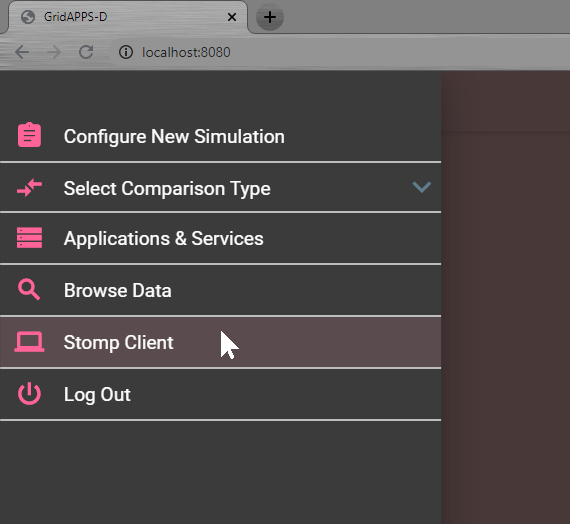

Change the topic to the Powergrid Model API topic: `goss.gridappsd.process.request.data.powergridmodel`

Enter the SPARQL query wrapped as a JSON string, like this, and click `Send request`

```
{
        "requestType": "QUERY",
        "resultFormat": "JSON",
        "queryString": "select ?feeder_name ?subregion_name ?region_name WHERE {?line r:type c:Feeder.?line c:IdentifiedObject.name  ?feeder_name.?line c:Feeder.NormalEnergizingSubstation ?substation.?substation r:type c:Substation.?substation c:Substation.Region ?subregion.?subregion  c:IdentifiedObject.name  ?subregion_name .?subregion c:SubGeographicalRegion.Region  ?region . ?region   c:IdentifiedObject.name  ?region_name}"
}
```

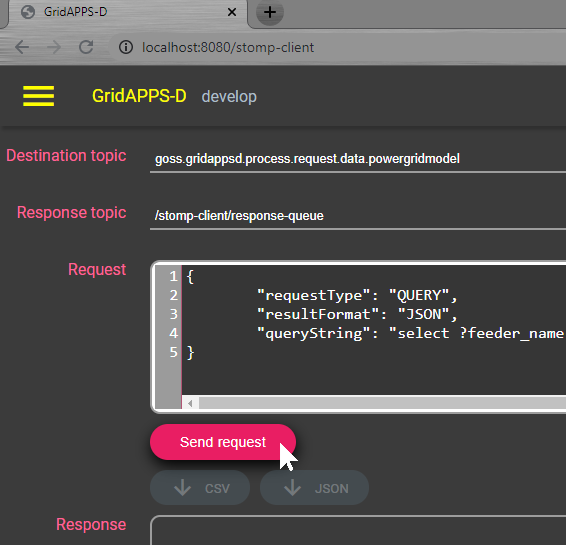

The PowerGrid Model API response will be displayed in the dialogue box below.